In [1]:
# import dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
# load the data
diabetes_df= pd.read_csv(Path('./Resources/diabetesatlascountydata.csv'))
fast_food_df= pd.read_csv(Path('./Resources/merged_fastfood_data.csv'))
population_df = pd.read_csv(Path('./Resources/number_people_area.csv'))

In [3]:
#Drop Null Values
diabetes_df = diabetes_df.dropna()
fast_food_df = fast_food_df.dropna()
population_df = population_df.dropna()

In [4]:
# Drop Duplicate rows diabetes
diabetes_df= diabetes_df.drop_duplicates()
diabetes_df

,County,State,CountyFIPS,Number,Lower Limit,Upper Limit
0,Kalawao County,Hawaii,15005.0,10.0,3.0,23.0
1,King County,Texas,48269.0,20.0,9.0,41.0
2,Arthur County,Nebraska,31005.0,23.0,9.0,46.0
3,Blaine County,Nebraska,31009.0,28.0,15.0,50.0
4,Kenedy County,Texas,48261.0,32.0,15.0,65.0
...,...,...,...,...,...,...
3214,Orange County,California,6059.0,206411.0,181489.0,235990.0
3215,Maricopa County,Arizona,4013.0,276140.0,263696.0,289218.0
3216,Harris County,Texas,48201.0,322085.0,283149.0,366035.0
3217,Cook County,Illinois,17031.0,372183.0,344762.0,398701.0


In [5]:
#drop duplicate rows fast food
fast_food_df= fast_food_df.drop_duplicates()
fast_food_df

,address,city,latitude,longitude,restaurant_name,postal_code,state_name
0,800 N Canal Blvd,Thibodaux,29.814697,-90.814742,SONIC Drive In,70301,Louisiana
2,206 Wears Valley Rd,Pigeon Forge,35.803788,-83.580553,Taco Bell,37863,Tennessee
3,3652 Parkway,Pigeon Forge,35.782339,-83.551408,Arby's,37863,Tennessee
4,2118 Mt Zion Parkway,Morrow,33.562738,-84.321143,Steak 'n Shake,30260,Georgia
5,9768 Grand River Ave,Detroit,42.368823,-83.138251,Wendy's,48204,Michigan
...,...,...,...,...,...,...,...
19985,3956 Guthrie St,East Chicago,41.640760,-87.433727,White Castle,46312,Indiana
19987,3013 Peach Orchard Rd,Augusta,33.415257,-82.024531,Wendy's,30906,Georgia
19988,678 Northwest Hwy,Cary,42.217300,-88.255800,Lee's Oriental Martial Arts,60013,Illinois
19989,1708 Main St,Longmont,40.189190,-105.101720,Five Guys,80501,Colorado


In [6]:
#drop unnecesary columns
statepopulation_df= population_df.drop(['STNAME', 'CTYNAME', 'POPESTIMATE2017'], axis = 1)
statepopulation_df.head()

,State,State Population
0,Alabama,4874486.0
1,Alaska,739700.0
2,Arizona,7044008.0
3,Arkansas,3001345.0
4,California,39358497.0


In [7]:
#Count the number of restaurants per state
fastfood_state= fast_food_df.groupby(['state_name']).count()
fastfood_state.head()

,address,city,latitude,longitude,restaurant_name,postal_code
state_name,,,,,,
Alabama,241,241,241,241,241,241
Alaska,28,28,28,28,28,28
Arizona,494,494,494,494,494,494
Arkansas,235,235,235,235,235,235
California,1761,1761,1761,1761,1761,1761


In [8]:
#drop Puerto Rico- since not found in both data sets
diabetes_df = diabetes_df[diabetes_df['State'] != 'Puerto Rico']
diabetes_df.head()

,County,State,CountyFIPS,Number,Lower Limit,Upper Limit
0,Kalawao County,Hawaii,15005.0,10.0,3.0,23.0
1,King County,Texas,48269.0,20.0,9.0,41.0
2,Arthur County,Nebraska,31005.0,23.0,9.0,46.0
3,Blaine County,Nebraska,31009.0,28.0,15.0,50.0
4,Kenedy County,Texas,48261.0,32.0,15.0,65.0


In [9]:
#Add the total number of diabetes cases by state
diabetes_state= diabetes_df.groupby(['State']).sum()
diabetes_state.head()

,CountyFIPS,Number,Lower Limit,Upper Limit
State,,,,
Alabama,71489.0,530018.0,423376.0,653637.0
Alaska,62340.0,44862.0,35670.0,56028.0
Arizona,60208.0,501839.0,461769.0,544070.0
Arkansas,380625.0,299417.0,223719.0,393623.0
California,351364.0,2593251.0,2180781.0,3065568.0


In [10]:
#Join Fast food & diabetes data frames by State
diabetes_state.index.names = ['state_name']
joined_df= pd.merge(fastfood_state, diabetes_state, on='state_name', how='outer')

In [11]:
joined_df.head()

,address,city,latitude,longitude,restaurant_name,postal_code,CountyFIPS,Number,Lower Limit,Upper Limit
state_name,,,,,,,,,,
Alabama,241,241,241,241,241,241,71489.0,530018.0,423376.0,653637.0
Alaska,28,28,28,28,28,28,62340.0,44862.0,35670.0,56028.0
Arizona,494,494,494,494,494,494,60208.0,501839.0,461769.0,544070.0
Arkansas,235,235,235,235,235,235,380625.0,299417.0,223719.0,393623.0
California,1761,1761,1761,1761,1761,1761,351364.0,2593251.0,2180781.0,3065568.0


In [12]:
#Delete extra columns
clean_joined_df= joined_df.drop(['address', 'city', 'latitude', 'longitude', 'postal_code', 'CountyFIPS', 'Lower Limit', 'Upper Limit'], axis = 1)
clean_joined_df.head()

,restaurant_name,Number
state_name,,
Alabama,241,530018.0
Alaska,28,44862.0
Arizona,494,501839.0
Arkansas,235,299417.0
California,1761,2593251.0


In [13]:
#Rename columns
clean_joined_df = clean_joined_df.rename(columns={"restaurant_name": "number_of_restaurants", "Number": "number_of_diabetes_cases"})
clean_joined_df.head()

,number_of_restaurants,number_of_diabetes_cases
state_name,,
Alabama,241,530018.0
Alaska,28,44862.0
Arizona,494,501839.0
Arkansas,235,299417.0
California,1761,2593251.0


In [14]:
#Add population to clean_joined_df
population = statepopulation_df.rename(columns={"State": "state_name"})
joined_population_df = pd.merge(population, clean_joined_df, on='state_name', how='outer')
joined_population_df.head()

,state_name,State Population,number_of_restaurants,number_of_diabetes_cases
0,Alabama,4874486.0,241,530018.0
1,Alaska,739700.0,28,44862.0
2,Arizona,7044008.0,494,501839.0
3,Arkansas,3001345.0,235,299417.0
4,California,39358497.0,1761,2593251.0


In [15]:
# calculate per capita rate of restaurants 
joined_population_df['restaurants_per_capita'] = joined_population_df['number_of_restaurants']/joined_population_df['State Population']
joined_population_df.head()

,state_name,State Population,number_of_restaurants,number_of_diabetes_cases,restaurants_per_capita
0,Alabama,4874486.0,241,530018.0,0.000049
1,Alaska,739700.0,28,44862.0,0.000038
2,Arizona,7044008.0,494,501839.0,0.000070
3,Arkansas,3001345.0,235,299417.0,0.000078
4,California,39358497.0,1761,2593251.0,0.000045


In [16]:
# calculate per capita rate of diabetes
joined_population_df['diabetes_per_capita'] = joined_population_df['number_of_diabetes_cases']/joined_population_df['State Population']
joined_population_df.head()

,state_name,State Population,number_of_restaurants,number_of_diabetes_cases,restaurants_per_capita,diabetes_per_capita
0,Alabama,4874486.0,241,530018.0,0.000049,0.108733
1,Alaska,739700.0,28,44862.0,0.000038,0.060649
2,Arizona,7044008.0,494,501839.0,0.000070,0.071243
3,Arkansas,3001345.0,235,299417.0,0.000078,0.099761
4,California,39358497.0,1761,2593251.0,0.000045,0.065888


In [17]:
# convert to csv
joined_population_df.to_csv(r'Resources/joined_df.csv', index=False)

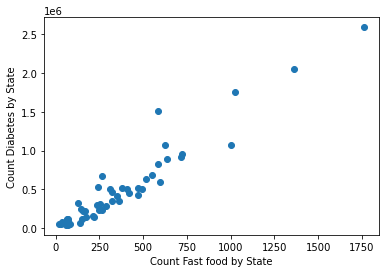

In [18]:
# plot the data (count diabetes vs. fastfood)
plt.scatter(joined_population_df.number_of_restaurants, joined_population_df.number_of_diabetes_cases)
plt.xlabel('Count Fast food by State')
plt.ylabel('Count Diabetes by State')
plt.show()

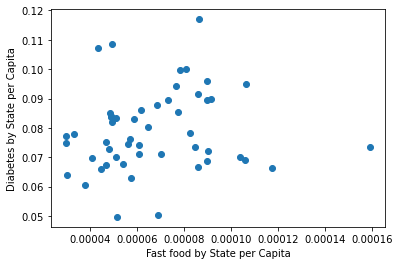

In [19]:
# plot the data (per capita rates diabetes vs. fastfood)
plt.scatter(joined_population_df.restaurants_per_capita, joined_population_df.diabetes_per_capita)
plt.xlabel('Fast food by State per Capita')
plt.ylabel('Diabetes by State per Capita')
plt.show()

In [20]:
# define the x variable
X = joined_population_df.number_of_restaurants.values.reshape(-1, 1)
X[:5]
X.shape

(51, 1)

In [21]:
# define the y variable
y = joined_population_df.number_of_diabetes_cases
y.shape

(51,)

In [22]:
# instantiate the model
model = LinearRegression()

In [23]:
# fit the model
model.fit(X, y)

LinearRegression()

In [24]:
# generate predictions
y_pred = model.predict(X)
print(y_pred.shape)

(51,)


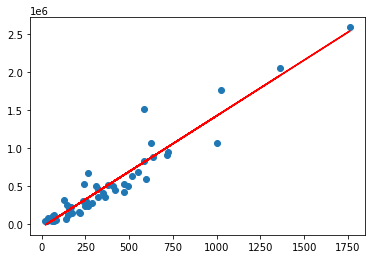

In [25]:
# plot the predictions
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [26]:
# examine the specific parameters of our model: the slope and the y-intercept
print(model.coef_)
print(model.intercept_)

[1469.1630223]
-43992.82037646673


In [30]:
#Calculate R2 score (i.e accuracy)
r2_score = model.score(X, y_pred)
print(r2_score*100,'%')

99.76862630810155 %
